In [1]:
%pip install tensorflow
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X_df = pd.read_csv('../03_input/combined_running_data.csv')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.21.12
    Uninstalling protobuf-4.21.12:
      Successfully uninstalled protobuf-4.21.12
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
X_df['datetime'] = pd.to_datetime(X_df['date'])
# shift the data by one day
X_df['datetime'] = X_df['datetime'] - pd.DateOffset(days=1)
X_df['datetime']


0       2022-07-12
1       2022-07-12
2       2022-07-12
3       2022-07-12
4       2022-07-12
           ...    
60352   2022-07-21
60353   2022-07-21
60354   2022-07-21
60355   2022-07-21
60356   2022-07-21
Name: datetime, Length: 60357, dtype: datetime64[ns]

In [3]:
feature_df = pd.read_csv('../03_input/feature.csv')
feature_df['datetime'] = pd.to_datetime(feature_df['datetime_date'])

#change the datetime column name to date
feature_df = feature_df.rename(columns={'datetime':'date'})

feature_df

,datetime_date,month_7,month_8,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Wind Speed_int,Temperature_int,Humidity_int,date
0,2022-07-31,True,False,False,False,False,False,True,False,False,False,False,False,False,True,4,84,79,2022-07-31
1,2022-07-30,True,False,False,False,False,False,True,False,False,False,False,False,True,False,7,82,79,2022-07-30
2,2022-07-29,True,False,False,False,False,False,True,False,False,False,False,True,False,False,2,86,58,2022-07-29
3,2022-07-28,True,False,False,False,False,True,False,False,False,False,True,False,False,False,9,73,88,2022-07-28
4,2022-07-27,True,False,False,False,False,True,False,False,False,True,False,False,False,False,4,77,89,2022-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2022-08-05,False,True,True,False,False,False,False,False,False,False,False,True,False,False,2,90,66,2022-08-05
58,2022-08-04,False,True,True,False,False,False,False,False,False,False,True,False,False,False,4,90,75,2022-08-04
59,2022-08-03,False,True,True,False,False,False,False,False,False,True,False,False,False,False,7,90,75,2022-08-03
60,2022-08-02,False,True,True,False,False,False,False,False,True,False,False,False,False,False,2,88,75,2022-08-02


In [4]:
grouped_by_date = X_df.groupby("date")

grid_height = 31
grid_width = 33
reshaped_data = []

for date, group in grouped_by_date:

    reshaped_grid = group["keep_num"].to_numpy().reshape(grid_height, grid_width, -1)
    # flattened_grid = reshaped_grid.flatten()  # 展平为一维数组

    # 将数据添加到列表中
    reshaped_data.append((date, reshaped_grid))

    # reshaped_data.append(group["keep_length"].to_numpy().reshape(grid_height, grid_width))

In [5]:
# Convert the list of tuples into a DataFrame
reshaped_df = pd.DataFrame(reshaped_data, columns=['date', 'runner_matrix'])

# Ensure the date column is the right type
reshaped_df['date'] = pd.to_datetime(reshaped_df['date'])

In [6]:
# Convert the 'date' column to datetime format if it's not already
feature_df['date'] = pd.to_datetime(feature_df['datetime_date'])  
feature_df.drop('datetime_date', axis=1, inplace=True)  # remove the old date column

# merge runner matrix with weather data
combined_data = pd.merge(reshaped_df, feature_df, on='date')

In [7]:
combined_data

,date,runner_matrix,month_7,month_8,week_of_month_1,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,Wind Speed_int,Temperature_int,Humidity_int
0,2022-07-04,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",True,False,True,False,False,False,False,True,False,False,False,False,False,False,7,81,84
1,2022-07-05,"[[[1.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0...",True,False,True,False,False,False,False,False,True,False,False,False,False,False,4,82,89
2,2022-07-06,"[[[2.0], [2.0], [0.0], [0.0], [1.0], [0.0], [0...",True,False,True,False,False,False,False,False,False,True,False,False,False,False,2,79,83
3,2022-07-07,"[[[1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0...",True,False,True,False,False,False,False,False,False,False,True,False,False,False,4,88,58
4,2022-07-08,"[[[2.0], [2.0], [0.0], [1.0], [2.0], [1.0], [0...",True,False,False,True,False,False,False,False,False,False,False,True,False,False,9,88,58
5,2022-07-09,"[[[2.0], [2.0], [0.0], [0.0], [0.0], [0.0], [0...",True,False,False,True,False,False,False,False,False,False,False,False,True,False,7,90,49
6,2022-07-10,"[[[2.0], [2.0], [0.0], [0.0], [0.0], [0.0], [0...",True,False,False,True,False,False,False,False,False,False,False,False,False,True,2,73,88
7,2022-07-11,"[[[2.0], [2.0], [1.0], [1.0], [1.0], [1.0], [1...",True,False,False,True,False,False,False,True,False,False,False,False,False,False,2,81,61
8,2022-07-12,"[[[2.0], [2.0], [0.0], [0.0], [0.0], [0.0], [0...",True,False,False,True,False,False,False,False,True,False,False,False,False,False,7,70,100
9,2022-07-13,"[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...",True,False,False,True,False,False,False,False,False,True,False,False,False,False,4,84,66


In [8]:
# We need to create sequences -- let's start by initializing our lists
sequences = []
next_day_runner_matrix = []

for i in range(len(combined_data) - 7):
    # Get the last 7 days + current day to predict next day
    last_7_days = combined_data.iloc[i:i+7]
    
    # Sequence of runner matrices
    runner_sequence = np.stack(last_7_days['runner_matrix'].to_numpy()) 
    
    # Sequence of additional features for the last 7 days
    features_sequence = last_7_days.drop(columns=['date', 'runner_matrix']).to_numpy()
    # Reshape to have the same second and third dimensions as the runner_sequence
    features_sequence_reshaped = features_sequence[:, np.newaxis, np.newaxis, :]
    # Repeat the features to match the spatial dimensions of the runner_sequence
    features_repeated = np.repeat(np.repeat(features_sequence_reshaped, runner_sequence.shape[1], axis=1), runner_sequence.shape[2], axis=2)
   
    # The runner matrix we want to predict is for the next day, not included in the last 7 days sequence
    current_day = combined_data.iloc[i+7]
    next_day_runner_matrix.append(current_day['runner_matrix'])

    # Combine runner sequence with features sequence along the last axis
    combined_sequence = np.concatenate((runner_sequence, features_repeated), axis=-1)
    sequences.append(combined_sequence)

# Convert lists to numpy arrays for the model
X = np.array(sequences)
y = np.stack(next_day_runner_matrix)

In [9]:
# Convert X and y to a consistent data type (e.g., float32)
X = np.asarray(X).astype('float32')
y = np.asarray(y).astype('float32')

print("X shape:", X.shape)
print("X data type:", X.dtype)
print("y shape:", y.shape)
print("y data type:", y.dtype)

# Ensure all values are finite and not NaN
assert np.isfinite(X).all(), "X contains non-finite values"
assert np.isfinite(y).all(), "y contains non-finite values"

y = y.reshape(y.shape[0], -1)  # Reshape y to be 2D: (52, 31*33)
print("y shape:", y.shape)

X shape: (52, 7, 31, 33, 18)
X data type: float32
y shape: (52, 31, 33, 1)
y data type: float32
y shape: (52, 1023)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, TimeDistributed, Flatten

grid_height = 31
grid_width = 33

# Define the model
model = Sequential()

# TimeDistributed CNN layers for spatial features
model.add(TimeDistributed(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'), input_shape=(7, grid_height, grid_width, X.shape[-1])))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

# LSTM layer for temporal features
model.add(LSTM(units=50, return_sequences=False))

# Output layer to predict the runner matrix
model.add(Dense(units=grid_height * grid_width, activation='linear'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [11]:
# Train the model - Adjust epochs and batch_size based on your computational capacity and dataset size
history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100


2024-04-30 22:10:29.440293: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2/2 [==============================] - 1s 258ms/step - loss: 84.8164 - val_loss: 158.3159
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 84.2437 - val_loss: 157.6851
Epoch 3/100
2/2 [==============================] - 0s 28ms/step - loss: 83.7758 - val_loss: 157.0424
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 83.2946 - val_loss: 156.3739
Epoch 5/100
2/2 [==============================] - 0s 32ms/step - loss: 82.8016 - val_loss: 155.6917
Epoch 6/100
2/2 [==============================] - 0s 34ms/step - loss: 82.3026 - val_loss: 154.9645
Epoch 7/100
2/2 [==============================] - 0s 29ms/step - loss: 81.7720 - val_loss: 154.2710
Epoch 8/100
2/2 [==============================] - 0s 28ms/step - loss: 81.2678 - val_loss: 153.5792
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 80.7592 - val_loss: 152.8908
Epoch 10/100
2/2 [==============================] - 0s 29ms/step - loss: 80.2627 - val_loss: 152.2067


In [20]:
print(type(history))

history.history.keys() # dict_keys(['loss', 'val_loss'])
np.save(f'../04_output/test_history.npy', history.history)


<class 'keras.callbacks.History'>


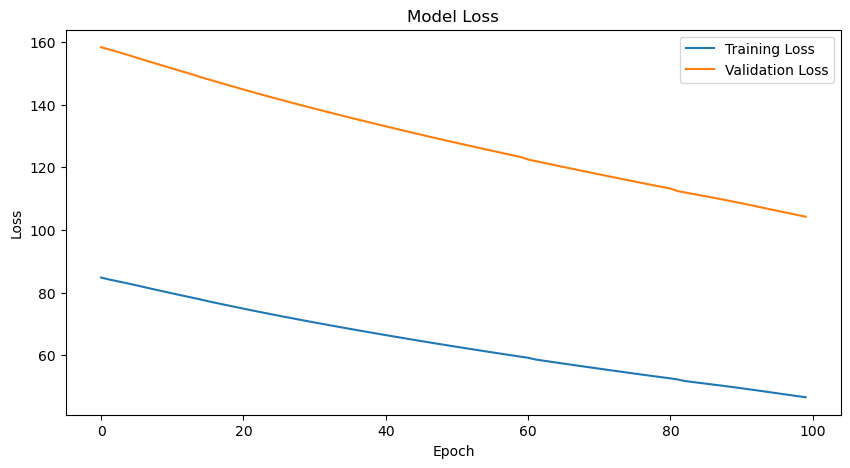

In [12]:
# plot the training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [13]:
# reshaped_array = np.array([x[1] for x in reshaped_data])
# reshaped_array.shape

# reshaped_array[0]

In [14]:
# import pandas as pd
# import numpy as np
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Load and preprocess data
# X_df = pd.read_csv('../03_input/combined_running_data.csv')
# additional_data = pd.read_csv('../03_input/additional_features.csv')  # Load your additional features data

# # Ensure that the date columns match and are properly formatted
# additional_data['date'] = pd.to_datetime(additional_data['date'])
# X_df['date'] = pd.to_datetime(X_df['date'])
# data_combined = pd.merge(X_df, additional_data, on='date')

# # Normalize or standardize your additional features here if necessary
# # This step is critical especially for features like Temperature, Wind Speed, and Humidity
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # One-hot features don't need scaling
# scale_cols = ['Wind Speed_int', 'Temperature_int', 'Humidity_int']
# additional_data[scale_cols] = scaler.fit_transform(additional_data[scale_cols])

# # Group and reshape data by date
# grouped_by_date = data_combined.groupby("date")
# reshaped_data = []
# for date, group in grouped_by_date:
#     reshaped_grid = group["keep_num"].values.reshape(31, 33, 1)  # Reshape and keep spatial dimensions
#     additional_features = group.drop(['date', 'keep_num'], axis=1).values  # Extract additional features
#     reshaped_data.append((date, reshaped_grid, additional_features))

# # Prepare sequential input
# sequence_length = 6
# input_data, target_values = [], []
# for i in range(len(reshaped_data) - sequence_length):
#     sequence = [reshaped_data[j][1:] for j in range(i, i + sequence_length)]
#     grids = np.array([s[0] for s in sequence])
#     features = np.array([s[1] for s in sequence])
#     input_data.append(np.concatenate([grids, features[:, None, None, :]], axis=-1))  # Merge features into grid
#     target_values.append(reshaped_data[i + sequence_length][1][0])  # Next grid

# input_data = np.array(input_data)
# target_values = np.array(target_values)

# # Define the model
# model = keras.Sequential([
#     layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu'), input_shape=(6, 31, 33, 1 + additional_features.shape[1])),
#     layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
#     layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')),
#     layers.TimeDistributed(layers.Flatten()),
#     layers.LSTM(50, return_sequences=True),
#     layers.Dense(31*33, activation='linear')  # Adjust according to your output requirements
# ])

# model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# # Train the model
# model.fit(input_data, target_values, epochs=300, batch_size=8, validation_split=0.2)

# # Evaluate the model
# model.evaluate(input_data, target_values)


# modeling

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


## target value set up
这里我们有两种可能的set up,

第一个是对于明天的预测

第二个事对于一系列的未来的预测

我们先从简单的入手. 进行-1的shift, 我们可以得到明天的预测

In [16]:
import numpy as np

# 输入数据集
input_data = []
# 目标数据集
target_values = []

# 这里我们创建了基于时间步的输入和目标数据集
# 使用循环来遍历数据，确保输入的长度是6，并且目标值是接下来的1个时间步

for i in range(len(reshaped_array) - 7):
    # 输入数据是连续的6个时间步
    input_data.append(reshaped_array[i:i+7, :])

    # 目标值是紧接在这6个时间步后的那个时间步
    target_values.append(reshaped_array[i+7, :])

# 将输入数据和目标值转换为numpy数组
input_data = np.array(input_data)
target_values = np.array(target_values)


NameError: name 'reshaped_array' is not defined

In [ ]:
reshaped_array.shape, input_data.shape, target_values.shape

((59, 31, 33, 1), (52, 7, 31, 33, 1), (52, 31, 33, 1))

In [ ]:
# change the shape of the target_values from (n, 31, 33, 1) to (n, 31*33)
target_values = target_values.reshape(-1, 31*33)

In [ ]:
target_values.shape

(52, 1023)

In [ ]:
from tensorflow.keras import layers, models

# 模型结构
model = models.Sequential([
    layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu'), input_shape=(7, 31, 33, 1)),
    layers.TimeDistributed(layers.MaxPooling2D((2, 2))),
    layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')),
    layers.TimeDistributed(layers.Flatten()),  # 将二维特征展平
    layers.LSTM(50, activation='relu', return_sequences=False),  # 确保 `return_sequences=False`
    layers.Dense(31*33, activation='linear')  # 输出层，应匹配目标值的形状
])

# # Define the model 
# model = keras.Sequential([ 
#     layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu'), input_shape=(6, 31, 33, 1 + additional_features.shape[1])), 
#     layers.TimeDistributed(layers.MaxPooling2D((2, 2))), 
#     layers.TimeDistributed(layers.Conv2D(32, (3, 3), activation='relu')), 
#     layers.TimeDistributed(layers.Flatten()), 
#     layers.LSTM(50, return_sequences=True), 
#     layers.Dense(31*33, activation='linear') # Adjust according to your output requirements 
#     ])

# 编译模型
model.compile(
    optimizer='adam',
    loss='mse',  # 使用均方误差
    metrics=['mae']  # 平均绝对误差
)

# 训练模型
model.fit(
    input_data,  # 输入数据
    target_values,  # 目标值
    epochs=1000,  # 训练轮数
    batch_size=8,  # 批量大小
    validation_split=0.3  # 20% 用于验证
)


Epoch 1/1000


/opt/anaconda3/envs/6c51/lib/python3.12/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 93.9969 - mae: 6.7007 - val_loss: 161.6063 - val_mae: 8.3518
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 80.4715 - mae: 6.0101 - val_loss: 143.4458 - val_mae: 7.2330
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 74.5911 - mae: 5.4990 - val_loss: 134.5462 - val_mae: 6.9755
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 64.3376 - mae: 5.0758 - val_loss: 112.5051 - val_mae: 6.6101
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 53.4721 - mae: 4.8190 - val_loss: 89.7382 - val_mae: 5.6592
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 38.1593 - mae: 3.9791 - val_loss: 66.2696 - val_mae: 4.8099
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 26.2976 - mae: 3.2638 - val_loss: 49.5534 - val_mae: 4.0554
Epoch 8/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 17.9061 - mae: 2.5778 - val_loss: 38.5034 - val_mae: 3.5351
Epoch 9/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss

In [ ]:
# 在测试集上评估模型
model.evaluate(input_data, target_values)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.2160 - mae: 1.1185 


[8.909167289733887, 1.3646113872528076]

In [ ]:
# mae / target_values.mean()
model.predict(input_data).shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


(52, 1023)

In [ ]:
print(target_values.shape)
# change the shape of the target_values from (n, 31*33) to (n, 31, 33, 1)
target_values = target_values.reshape(-1, 31, 33, 1)
target_values.shape


(52, 1023)


(52, 31, 33, 1)

In [ ]:
# visulizer
reshaped_array.shape

(59, 31, 33, 1)